## Gradient descent: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt  

### Gradient descent with one independent variable

##### The data： Boston Housing Price Dataset

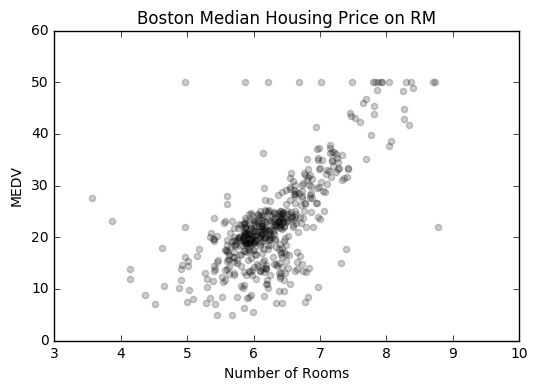

In [2]:
from sklearn.datasets import load_boston
bdata = load_boston() # using the Boston Housing Prices Data Set
rm = bdata.data[:,5] # Number of Rooms
price = bdata.target # Median PRIC
plt.figure()
plt.scatter(rm, price, color="black", alpha=0.2)
plt.xlabel("Number of Rooms")
plt.ylabel("MEDV")
plt.title("Boston Median Housing Price on RM")
plt.show()

In [3]:
import time
"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""

def bivariate_ols(xvalues, yvalues, R=0.0001, MaxIterations=100000):
    t0 = time.time()
    m = xvalues.shape[0] # rows of xvalues
    # hypothesis: y = alpha + beta * x
    alpha = 0 # initial alpha
    beta = 0 # inital beta
    error = np.mean((alpha + beta*xvalues - yvalues)**2) /2 # scalar
    for i in range(MaxIterations):
        alpha_gradient = np.mean(alpha + beta*xvalues - yvalues)
        beta_gradient = np.sum((alpha + beta*xvalues - yvalues)*xvalues)/m 
        alpha = alpha - R * alpha_gradient # update alpha
        beta = beta- R* beta_gradient # update beta
        new_error = np.mean((alpha + beta*xvalues - yvalues)**2)/2
        if abs(error - new_error) <= 0.0000001: # converge conditions
            print("converged, iterations: %d"%(i))
            break
        else:
            error = new_error
    print("Time taken: %.2f seconds" %(time.time() - t0))
    return alpha, beta

Time taken: 3.69 seconds
-24.0843983585 7.43790114824
converged, iterations: 40832
Time taken: 1.52 seconds
-34.4108550791 9.06127249663
Time taken: 3.69 seconds
nan nan


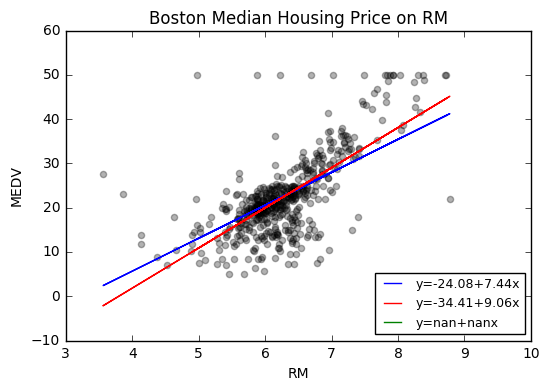

In [4]:
# example function call
X = bdata.data[:,5:6] # RM
Y = bdata.target.reshape(len(bdata.target),1) # reshape Y to n by 1 array
R = [0.001, 0.01, 0.05]
col = ["blue", "red", "green"]
fig = plt.figure()
plt.scatter(X,Y, color="black", alpha=0.3)
for i in range(3):
    alpha, beta = bivariate_ols(X, Y, R[i])
    print(alpha, beta)
    plt.plot(X,alpha+beta*X, color=col[i], label="y=%.2f+%.2fx"%(alpha,beta))
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Boston Median Housing Price on RM")
plt.legend(loc="lower right", prop={"size":9})
plt.show()

### Gradient descent with multiple variables

In [5]:
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""
def multivariate_ols(xvalue_matrix, yvalues, R=0.0001, MaxIterations=100000):
    m = xvalue_matrix.shape[0] # row of matrix
    alpha = 0.0 # inital alpha
    beta_array = np.zeros([xvalue_matrix.shape[1],1]) # inital beta
    pred = np.dot(xvalue_matrix, beta_array) + np.full(fill_value=alpha, shape=[m,1])
    error = np.mean((pred-yvalues)**2)/2
    
    for i in range(1,MaxIterations):
        alpha_gradient = np.mean(pred-yvalues)
        beta_gradient = np.dot(np.transpose(pred-yvalues), xvalue_matrix)/m # shape is m*1
        alpha = alpha - R * alpha_gradient
        beta_array = beta_array - R * np.transpose(R * beta_gradient)
        pred = np.dot(xvalue_matrix, beta_array) + np.full(fill_value=alpha, shape=[m,1])
        new_error = np.mean((pred-yvalues)**2)/2
        if abs(error-new_error) <= 0.0001:
            print("Converged, iterations:%d"%(i))
            break
        else:
            error = new_error
    return alpha, beta_array

In [17]:
def standardize(raw_data):
    return (raw_data - np.mean(raw_data, axis=0))/np.std(raw_data, axis=0)


In [18]:
X = bdata.data[:,[0,5]] # RM and CRIM
Y = bdata.target.reshape(len(bdata.target),1)
R = [0.001,0.01, 0.1]
for r in R:
    print("R:", r)
    alpha, beta = multivariate_ols(standardize(X), Y, r) # use standardized features
    print("alpha={0}, beta={1}\n".format(alpha, beta.flatten()))

R: 0.001
Converged, iterations:4641
alpha=22.315913022071804, beta=[-0.01639927  0.02957419]

R: 0.01
Converged, iterations:17285
alpha=22.532806324110496, beta=[-2.22772498  4.92686618]

R: 0.1
Converged, iterations:403
alpha=22.532806324110656, beta=[-2.29732111  5.78782741]



### Normal Equation for Multivariate Linear Regression

In [47]:
import numpy.linalg as la
X = bdata.data[:, [0,5]]
X = standardize(X)
X = np.insert(X,0,1,axis=1)
Y = bdata.target.reshape(len(bdata.target),1)
tran_X = np.transpose(X)
theta = np.dot(np.dot(la.inv(np.dot(tran_X, X)),tran_X),Y)
theta

array([[ 22.53280632],
       [ -2.24860926],
       [  5.89441657]])